In [1]:
%tensorflow_version 1.x
import tensorflow
tensorflow.__version__


TensorFlow 1.x selected.


'1.15.2'

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import numpy as np
import cv2
import os
import imutils

from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score ,accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from os import listdir
from os.path import isfile, join
import tensorflow
import csv
import pandas


Using TensorFlow backend.


In [3]:
keras.__version__

'2.3.1'

In [4]:
tensorflow.__version__

'1.15.2'

In [5]:
a= [0,1,2,3]
a[1:]

[1, 2, 3]

In [6]:
img_data= pandas.read_csv('drive/My Drive/korat_sauce/train_new_with_blur.csv', header = None,na_values=0)
img_data = img_data.replace(np.nan,0)
train_data_list = np.array(img_data.loc[:, img_data.columns != 0])
sol_of_train_data = np.array(img_data[0])

In [7]:

sol_of_train_data = np.array(sol_of_train_data)

In [8]:

num_classes = 4
epochs = 20000


In [9]:
X_train, X_test, y_train, y_test = train_test_split(train_data_list, sol_of_train_data, test_size=0.2,random_state=1)

In [10]:
y_test[0]

1

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_test)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [12]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
y_train[0]

array([1., 0., 0., 0.], dtype=float32)

In [14]:
model = Sequential()
model.add(Dense(num_classes, input_dim=3780, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 15124     
Total params: 15,124
Trainable params: 15,124
Non-trainable params: 0
_________________________________________________________________


In [16]:
 model.compile(loss="binary_crossentropy",
              optimizer= "SGD",
              metrics=["accuracy"]
               )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
seq_model = model.fit(X_train, y_train,
              batch_size=32,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)

Streaming output truncated to the last 5000 lines.
Epoch 17501/20000
2251/2251 [==============================] - 0s 148us/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.4162 - val_accuracy: 0.8721
Epoch 17502/20000
2251/2251 [==============================] - 0s 124us/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.4162 - val_accuracy: 0.8721
Epoch 17503/20000
2251/2251 [==============================] - 0s 130us/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.4162 - val_accuracy: 0.8721
Epoch 17504/20000
2251/2251 [==============================] - 0s 122us/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.4163 - val_accuracy: 0.8717
Epoch 17505/20000
2251/2251 [==============================] - 0s 117us/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.4163 - val_accuracy: 0.8721
Epoch 17506/20000
2251/2251 [==============================] - 0s 96us/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.4163 - val_accuracy: 0.8721
Epoch 17507/20000
2251/2251 [===

In [ ]:
import pandas as pd
metrics = pd.DataFrame(seq_model.history)
metrics

,val_loss,val_accuracy,loss,accuracy
0,0.560525,0.750000,0.592986,0.718014
1,0.552221,0.750000,0.549714,0.750000
2,0.547001,0.750000,0.541939,0.750000
3,0.540995,0.750000,0.535020,0.750000
4,0.534621,0.750000,0.528253,0.750000
...,...,...,...,...
19995,0.427603,0.872114,0.022327,1.000000
19996,0.427616,0.872114,0.022326,1.000000
19997,0.427612,0.871670,0.022325,1.000000
19998,0.427617,0.872114,0.022324,1.000000


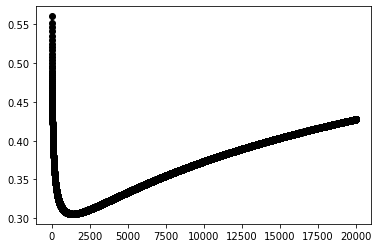

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list(seq_model.history.values())[0],'k-o')

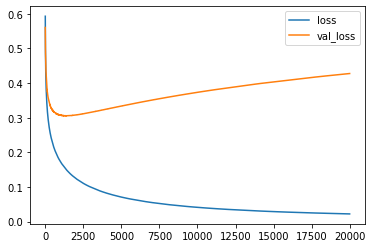

In [ ]:
metrics[['loss', 'val_loss']].plot()

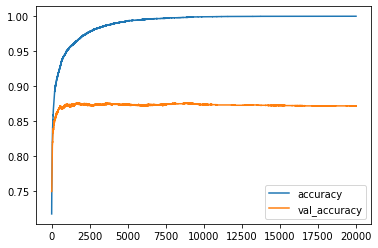

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

In [ ]:
scorecard = []
#test
img_data= pandas.read_csv('drive/My Drive/korat_sauce/use_for_test_not_move3.csv', header = None,na_values=0)
img_data = img_data.replace(np.nan,0)
train_data_list = np.array(img_data.loc[:, img_data.columns != 0])
sol_of_train_data = np.array(img_data[0])

prediction = model.predict(train_data_list)

 
label = prediction.argmax(axis=-1)

for num_row_data in range(len(train_data_list)):
  correct_label = int(sol_of_train_data[num_row_data])-1
  
  
  if (label[num_row_data] == correct_label):
        
        scorecard.append(1)
  else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
scorecard_array = np.asarray(scorecard)
print ("performance = ", scorecard_array.sum() /scorecard_array.size*100)


performance =  56.25


In [ ]:
print(train_data_list[0].shape)
print(train_data_list[0])
print(train_data_list.shape)
test_zero_array = np.zeros((1,3780))
print(test_zero_array.shape)
prediction1 = model.predict(test_zero_array)

(3780,)
[0.29479835 0.19440394 0.07180775 ... 0.11517439 0.06862919 0.44242663]
(576, 3780)
(1, 3780)
